In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json

# Libraries for displying the data. 
from IPython.core.display import HTML 
from ipywidgets import interact
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style("white")

In [4]:
training   = json.load(open("../data/kaggle/train.json"))
test       = json.load(open("../data/kaggle/test.json"))
validation = json.load(open("../data/kaggle/validation.json"))

In [5]:
# A function to be mapped over the json dictionary. 
def joinFn(dat):
    return [dat[0]["url"][0], dat[1]["label_id"]]

df_train   = pd.DataFrame(list(map(joinFn, zip(training["images"],training["annotations"]))),columns=["url","label"])
df_val = pd.DataFrame(list(map(joinFn, zip(validation["images"],validation["annotations"]))),columns=["url","label"])
df_test       = pd.DataFrame(list(map(lambda x: x["url"],test["images"])),columns=["url"])

In [6]:
df_train.head()

,url,label
0,https://img13.360buyimg.com/imgzone/jfs/t2857/...,5
1,http://www.tengdakeli.cn/350/timg01/uploaded/i...,5
2,https://img13.360buyimg.com/imgzone/jfs/t8899/...,5
3,http://img4.tbcdn.cn/tfscom/i1/2855447419/TB2S...,5
4,http://a.vpimg4.com/upload/merchandise/287883/...,5


In [7]:
#df_val.head()

In [8]:
#df_test.head()

In [9]:
print(f'Number of classes: {len( df_train["label"].unique())}')

Number of classes: 128


In [10]:
gp1 = df_train.groupby('label').count().reset_index()
#gp1.shape
gp1.head()

,label,url
0,1,1254
1,2,1521
2,3,2368
3,4,1500
4,5,1599


Text(0, 0.5, 'Counts')

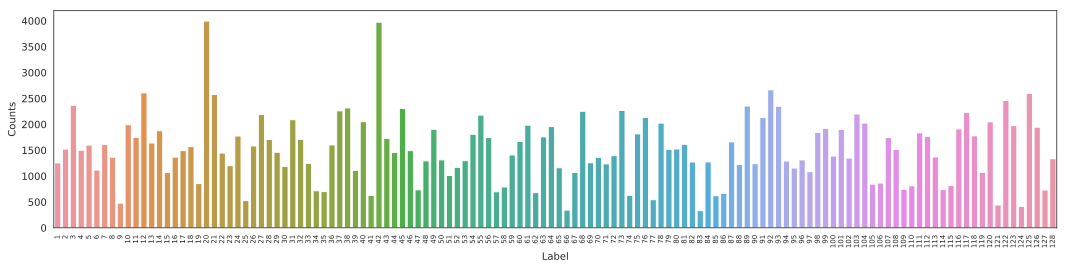

In [11]:
fig, ax = plt.subplots(figsize=[18,4]);
#sns.set(style="whitegrid")
ax.set_xticklabels(gp1['label'],rotation=90, fontsize=7)
ax = sns.barplot(x="label", y="url", data=gp1);
plt.xlabel("Label")
plt.ylabel("Counts")
#plt.savefig('../images/polarity.svg', format='svg',transparent=True )
#color ='#02d8e9'

In [12]:
def displayExamples(exampleIndex=0):
    outHTML = "<div>"
    for label in range(1,129):
        img_style = "width: 180px;height:180px; margin: 0px; float: left; border: 1px solid black;"
        captionDiv = "<div style='position:absolute;right:30px;color:red;font-size:30px;background-color:grey;padding:5px;opacity:0.5'>"+str(label)+"</div>"
        outHTML += "<div style='position:relative;display:inline-block'><img style='"+img_style+"' src='"+df_train[df_train.label == label].iloc[exampleIndex][0]+"'/>"+captionDiv+"</div>"
    outHTML += "</div>"
    display(HTML(outHTML))

displayExamples()

In [13]:
def displayCategoryExamples(category=0,nExamples=8):
    outHTML = "<div>"
    for idx in range(0,nExamples):
        img_style = "width: 180px;height:180px; margin: 0px; float: left; border: 1px solid black;"
        outHTML += "<div style='position:relative;display:inline-block'><img style='"+img_style+"' src='"+df_train[df_train.label == category].iloc[idx][0]+"'/></div>"
    outHTML += "</div>"
    display(HTML(outHTML))

In [14]:
displayCategoryExamples(80)